In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 150)

In [105]:
df = pd.read_csv("books2.csv", encoding="utf-8")

# DATA CLEANING

In [106]:
df.shape

(11127, 13)

In [107]:
df.head(15)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,err
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,09-01-04,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11-01-03,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,05-01-04,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9.78E+12,en-US,152,19,1,4/26/2005,Nimble Books,NaN
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9.78E+12,eng,3342,28242,808,09-12-05,Scholastic,NaN
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9.78E+12,eng,815,3628,254,11-01-05,Gramercy Books,NaN
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9.78E+12,eng,815,249558,4080,4/30/2002,Del Rey Books,NaN
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9.78E+12,eng,215,4930,460,08-03-04,Crown,NaN


In [108]:
# Checking the datatypes
df.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
  num_pages           object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
err                   object
dtype: object

In [109]:
# Get the non-NA values in column "err"
non_na_values = df["err"].notna()
# Filter the DataFrame to get only the rows with non-NA values in column "err"
df_non_na = df[non_na_values]
df_non_na

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,err
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004,Harvard University Press
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-04,Cold Spring Press
5877,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999,Huntington House Publishers
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-77,Brown Son & Ferguson Ltd.


In [110]:
# Making a list of indexes to drop the rows.
indexes_of_rows_to_drop = list(df_non_na.index)
indexes_of_rows_to_drop
# Dropping these rows
df = df.drop(index=[3348, 4702, 5877, 8979])

In [111]:
# Get the non-NA values in column "err"
non_na_values = df["err"].notna()
# Filter the DataFrame to get only the rows with non-NA values in column "err"
df_non_na = df[non_na_values]
# Checking "err" column again to see if there are any other values than NaN.
df["err"].isna().value_counts()
# Dropping "err" column because it is an artificial column I just created to import the dataframe.
df.drop(["err"], axis = 1, inplace = True)

In [112]:
# "isbn" column is just another unique number to identify the book, the International Standard Book Number.
# "isbn13" column is same but with 13 digits.
# I don't need other identification numbers for the books dataset so I drop these two columns.

df.drop(["isbn","isbn13"], axis = 1, inplace = True)

In [113]:
# Seems like num_pages has some spaces in the column names. Lets strip all column names so we have no whitespaces before and after.
df.columns = df.columns.str.strip()
# Now able to change the datatype of "average_rating" to float.
df["average_rating"] = df["average_rating"].astype(np.float64)
# Changing the Number of Pages column "num_pages" to int.
df["num_pages"] = df["num_pages"].astype(np.int64)

In [114]:
display(df.head(5))
df.dtypes

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,09-01-04,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11-01-03,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,05-01-04,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


bookID                  int64
title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [115]:
# Lets check if all publication dates are in DD/MM/YYYY format to fix all of them.
df["publication_date"].tail(15)
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
# Checking NaT (Not a Time) rows to fix.

invalid_rows = df['publication_date'].isna()
print(df.loc[invalid_rows, 'publication_date'])

# Fixing manually two cells where the publication_date is corrupted.
df.loc[8180, 'publication_date'] = pd.to_datetime('1999-01-01')
df.loc[11098, 'publication_date'] = pd.to_datetime('1975-01-01')

8180    NaT
11098   NaT
Name: publication_date, dtype: datetime64[ns]


In [116]:
# All datatypes are fixed now.
display(df.dtypes)
df.head()

bookID                         int64
title                         object
authors                       object
average_rating               float64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic


In [117]:
# Checking for missing values in the dataframe.
df.isna().sum()
# No missing values are found.

bookID                0
title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [118]:
df['language_code'].unique()
df['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [119]:
# Fixing the Language Codes and unifying them. Changing language codes to language names.
# Dictionary that consists Language codes to Language names.
lang_dict = {
    'eng': 'English',
    'en-US': 'English',
    'en-GB': 'English',
    'en-CA': 'English',
    'enm': 'Middle English',
    'fre': 'French',
    'ger': 'German',
    'spa': 'Spanish',
    'jpn': 'Japanese',
    'por': 'Portuguese',
    'lat': 'Latin',
    'grc': 'Ancient Greek',
    'ita': 'Italian',
    'zho': 'Chinese',
    'rus': 'Russian',
    'swe': 'Swedish',
    'msa': 'Malay',
    'nl': 'Dutch',
    'glg': 'Galician',
    'srp': 'Serbian',
    'tur': 'Turkish',
    'gla': 'Scottish Gaelic',
    'wel': 'Welsh',
    'ara': 'Arabic',
    'nor': 'Norwegian',
    'ale': 'Aleut',
    'mul': 'Multiple Languages'
}



# Replacing language codes with language names.
df['language_name'] = df['language_code'].replace(lang_dict)

# Dropping language code column.
df.drop(["language_code"], axis=1, inplace=True)

#df['language_name'].value_counts()

In [120]:
# Checking if there are any duplicate rows.
df.duplicated().sum()

0

In [121]:
# Data validation on "publication_date"
# 91 publication dates has to be fixed, actually the dates are almost correct put the century has to be 20th century instead of the 21th century.
df[df["publication_date"] > "2021-01-01"]
# Subtract 100 years from dates greater than 2021-01-01 because they are supposed to be in 20th century.
df.loc[df['publication_date'] > '2021-01-01', 'publication_date'] -= pd.DateOffset(years=100)

In [122]:
def splitting_string(text):
    first_author = text.split('/')
    return first_author[0]

df['author'] = df['authors'].apply(lambda x : splitting_string(x))
df.drop(["authors"], axis = 1, inplace = True)

In [123]:
import pickle
# Loading pickle file into dictionary.
with open('pickle_files/final_genres_dictionary.pkl', 'rb') as handle:
    final_genres_dictionary = pickle.load(handle)
    print('dictionary loaded successfully to variable')

dictionary loaded successfully to variable


In [124]:
# Convert the 'bookID' column to strings and apply the mapping
# Add all genres into a new column in df.
df['genre'] = df['bookID'].astype(str).map(final_genres_dictionary)

In [125]:
df["average_rating"].mean()

3.9340753393868564

In [126]:
# df_pub means DataFrame publishers, I will try to fix the publishers on this variable.
df_pub = df

In [127]:
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
import warnings
warnings.filterwarnings('ignore')

# Get the unique publishers
publishers = df_pub['publisher'].unique()

matches = pd.DataFrame(columns=['source', 'target', 'score'])

for i, source in enumerate(publishers):
    targets = [p for j, p in enumerate(publishers) if j != i]
    results = process.extract(source, targets, scorer=fuzz.token_sort_ratio)
    matches = matches.append(pd.DataFrame({'source': source, 
    'target': [r[0] for r in results], 'score': [r[1] for r in results]}))

matches_filtered = matches[matches['score'] < 100]
matches_sorted = matches_filtered.sort_values(by='score', ascending=False)
matches_sorted.head(20)

,source,target,score
0,HarperCollins Publishers,HarperCollinsPublishers,98
0,Editions de l'Olivier,Éditions de L'Olivier,98
0,St. Martin's Paperback,St. Martin's Paperbacks,98
0,Penguin Classics Deluxe Edition,Penguin Classics Deluxe Editions,98
0,Penguin Book Limited,Penguin Books Limited,98
0,Plaza & Janes Editores S.A.,Plaza & Janés Editores S.A.,98
0,Penguin Books Limited,Penguin Book Limited,98
0,Dover Publications (NY),Dover Publications (NYC),98
0,Bloomsbury Children's Books,Bloomsbury Childrens Books,98
0,W.W. Norton & Company (NY),W.W. Norton & Company (NYC),98


In [128]:
# Fixing publisher names

df_pub.loc[df_pub["publisher"].str.contains("Penguin"), "publisher"] = "Penguin Books"
df_pub.loc[df_pub["publisher"].str.contains("Scholastic"), "publisher"] = "Scholastic"
df_pub.loc[df_pub["publisher"].str.contains("Harper"), "publisher"] = "HarperCollins"
df_pub.loc[df_pub["publisher"].str.contains("Orion Publishing"), "publisher"] = "Orion Publishing Group"
df_pub.loc[df_pub["publisher"].str.contains("Princeton University Press"), "publisher"] = "Princeton University Press"
df_pub.loc[df_pub["publisher"].str.contains("Book Publishing Co"), "publisher"] = "Book Publishing Company"
df_pub.loc[df_pub["publisher"].str.contains("Vintage"), "publisher"] = "Vintage Books"
df_pub.loc[df_pub["publisher"].str.contains("Random House"), "publisher"] = "Random House"
df_pub.loc[df_pub["publisher"].str.contains("Puffin"), "publisher"] = "Puffin Books"
df_pub.loc[df_pub["publisher"].str.contains("Mariner"), "publisher"] = "Mariner Books"
df_pub.loc[df_pub["publisher"].str.contains("Ballantine"), "publisher"] = "Ballantine Books"
df_pub.loc[df_pub["publisher"].str.contains("Simon & Schuster"), "publisher"] = "Simon & Schuster"
df_pub.loc[df_pub["publisher"].str.contains("Pocket Star"), "publisher"] = "PPP Star Books"
df_pub.loc[df_pub["publisher"].str.contains("Pocket"), "publisher"] = "Pocket Books"
df_pub.loc[df_pub["publisher"].str.contains("PPP Star Books"), "publisher"] = "Pocket Star Books"
df_pub.loc[df_pub["publisher"].str.contains("Bantam"), "publisher"] = "Bantam Books"
df_pub.loc[df_pub["publisher"].str.contains("VIZ"), "publisher"] = "VIZ Media"
df_pub.loc[df_pub["publisher"].str.contains("Bantam"), "publisher"] = "Bantam Books"
df_pub.loc[df_pub["publisher"].str.contains("Underwood/Miller"), "publisher"] = "Underwood/Miller"
df_pub.loc[df_pub["publisher"].str.contains("Berkley"), "publisher"] = "Berkley"
df_pub.loc[df_pub["publisher"].str.contains("Dover"), "publisher"] = "Dover Publications"
df_pub.loc[df_pub["publisher"].str.contains("Collins Modern Classics"), "publisher"] = "HarperCollins"
df_pub.loc[df_pub["publisher"].str.contains("Modern Lib"), "publisher"] = "Modern Library"
df_pub.loc[df_pub["publisher"].str.contains("Del Rey"), "publisher"] = "Del Rey"
df_pub.loc[df_pub["publisher"].str.contains("Tor "), "publisher"] = "Tor Books"
df_pub.loc[df_pub["publisher"].str.contains("Grand Central"), "publisher"] = "Grand Central Publishing"
df_pub.loc[df_pub["publisher"].str.contains("Oxford"), "publisher"] = "Oxford University"
df_pub.loc[df_pub["publisher"].str.contains("W.W. Norton"), "publisher"] = "W.W. Norton & Company"
df_pub.loc[df_pub["publisher"].str.contains("Cambridge"), "publisher"] = "Cambridge University Press"
df_pub.loc[df_pub["publisher"].str.contains("Signet"), "publisher"] = "Signet"
df_pub.loc[df_pub["publisher"].str.contains("Simon Publications"), "publisher"] = "SavingSim"
df_pub.loc[df_pub["publisher"].str.contains("Simon"), "publisher"] = "Simon & Schuster"
df_pub.loc[df_pub["publisher"].str.contains("SavingSim"), "publisher"] = "Simon Publications"
df_pub.loc[df_pub["publisher"].str.contains("Anchor"), "publisher"] = "Anchor"
df_pub.loc[df_pub["publisher"].str.contains("William Morr"), "publisher"] = "William Morrow"
df_pub.loc[df_pub["publisher"].str.contains("Avon"), "publisher"] = "Avon"
df_pub.loc[df_pub["publisher"].str.contains("Library of Ame"), "publisher"] = "Library of America"
df_pub.loc[df_pub["publisher"].str.contains("Broadway"), "publisher"] = "Broadway"
df_pub.loc[df_pub["publisher"].str.contains("St. Martin"), "publisher"] = "St. Martin's Press"
df_pub.loc[df_pub["publisher"].str.contains("Basic B"), "publisher"] = "Basic Books"
df_pub.loc[df_pub["publisher"].str.contains("Vertigo"), "publisher"] = "Vertigo"
df_pub.loc[df_pub["publisher"].str.contains("Farrar"), "publisher"] = "Farrar  Straus and Giroux"
df_pub.loc[df_pub["publisher"].str.contains("DAW"), "publisher"] = "DAW"
df_pub.loc[df_pub["publisher"].str.contains("Picador"), "publisher"] = "Picador"
df_pub.loc[df_pub["publisher"].str.contains("G.P"), "publisher"] = "G.P. Putnam's Sons"
df_pub.loc[df_pub["publisher"].str.contains("Back Bay"), "publisher"] = "Back Bay Books"

In [129]:
# Filtering by string and checking publisher names.
filtered_df = df_pub[df_pub['publisher'].str.contains("Back Bay")]
filtered_df
filtered_df["publisher"].value_counts()

Back Bay Books    41
Name: publisher, dtype: int64

In [130]:
# Changing language_name column name to language.
df_pub = df_pub.rename({'language_name': 'language'}, axis=1)

In [131]:
# Assigning df_pub to df, to continue with naming df.
df=df_pub

### Adding the book descriptions to a new column called "description".

In [132]:
# Loading book_descriptions dictionary from pickle file.
with open('pickle_files/book_descriptions.pkl', 'rb') as f:
    book_descriptions = pickle.load(f)
    print('dictionary loaded successfully to variable')

dictionary loaded successfully to variable


In [133]:
df['description'] = df['bookID'].astype(str).map(book_descriptions)

In [134]:
df

,bookID,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language,author,genre,description
0,1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,2006-09-16,Scholastic,English,J.K. Rowling,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,2004-09-01,Scholastic,English,J.K. Rowling,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,2003-11-01,Scholastic,English,J.K. Rowling,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,2004-05-01,Scholastic,English,J.K. Rowling,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690,41428,164,2004-09-13,Scholastic,English,J.K. Rowling,Fantasy,Box Set containing Harry Potter and the Sorcer...
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,4.06,512,156,20,2004-12-21,Da Capo Press,English,William T. Vollmann,Fiction,William T. Vollmann is one of our greatest liv...
11123,45633,You Bright and Risen Angels,4.08,635,783,56,1988-12-01,Penguin Books,English,William T. Vollmann,Fiction,"In the jungles of South America, on the ice fi..."
11124,45634,The Ice-Shirt (Seven Dreams #1),3.96,415,820,95,1993-08-01,Penguin Books,English,William T. Vollmann,Historical Fiction,The time is the tenth century A.D. The newcome...
11125,45639,Poor People,3.72,434,769,139,2007-02-27,Ecco,English,William T. Vollmann,Nonfiction,because i was bad in my last life.because alla...


### SQL Alchemy to export the dataframe to mysql.

In [135]:
import pymysql.cursors
from sqlalchemy import create_engine
from sqlalchemy import text

In [136]:
import getpass

sql_pass = getpass.getpass()

In [137]:
connection_string = 'mysql+pymysql://root:' + sql_pass + '@localhost:3306/'
engine = create_engine(connection_string)

In [138]:
df.to_sql('staging_books', engine, 'books_project', if_exists='replace', index=False)

11123

# EDA (Explanatory Data Analysis)

In [139]:
# df
df

,bookID,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language,author,genre,description
0,1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,2006-09-16,Scholastic,English,J.K. Rowling,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,2004-09-01,Scholastic,English,J.K. Rowling,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,2003-11-01,Scholastic,English,J.K. Rowling,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,2004-05-01,Scholastic,English,J.K. Rowling,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690,41428,164,2004-09-13,Scholastic,English,J.K. Rowling,Fantasy,Box Set containing Harry Potter and the Sorcer...
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,4.06,512,156,20,2004-12-21,Da Capo Press,English,William T. Vollmann,Fiction,William T. Vollmann is one of our greatest liv...
11123,45633,You Bright and Risen Angels,4.08,635,783,56,1988-12-01,Penguin Books,English,William T. Vollmann,Fiction,"In the jungles of South America, on the ice fi..."
11124,45634,The Ice-Shirt (Seven Dreams #1),3.96,415,820,95,1993-08-01,Penguin Books,English,William T. Vollmann,Historical Fiction,The time is the tenth century A.D. The newcome...
11125,45639,Poor People,3.72,434,769,139,2007-02-27,Ecco,English,William T. Vollmann,Nonfiction,because i was bad in my last life.because alla...


In [158]:
df[df["author"] == "William Shakespeare"].head(15)

,bookID,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language,author,genre,description
420,1417,The Complete Pelican Shakespeare,4.50,1808,578,25,2002-11-07,Viking,English,William Shakespeare,Classics,The distinguished Pelican Shakespeare series h...
421,1419,The Complete Works,4.50,1248,62,6,1991-10-13,Gramercy,English,William Shakespeare,Classics,"Definitive, comprehensive, and handsome editio..."
422,1420,Hamlet,4.02,289,609271,7139,2005-08-01,Cambridge University Press,English,William Shakespeare,Classics,"Among Shakespeare's plays, ""Hamlet"" is conside..."
431,1433,Hamlet,4.02,148,1658,125,2001-12-01,Penguin Books,English,William Shakespeare,Classics,The general editors of the new series of forty...
433,1438,Shakespeare's Hamlet,4.02,240,102,16,2000-05-29,Cliffs Notes,English,William Shakespeare,Classics,"In the CliffsComplete guides, the novel's ""com..."
516,1625,Twelfth Night,3.98,272,138101,2513,2004-07-01,Simon & Schuster,English,William Shakespeare,Classics,"Named for the twelfth night after Christmas, t..."
1907,6823,Romeo & Juliet,3.74,288,179,4,1993-01-01,Nelson Thornes Ltd,English,William Shakespeare,Classics,The Shakespeare Made Easy series aims to take ...
1949,7006,Hamlet,4.02,352,9,2,2003-07-03,SparkNotes,English,William Shakespeare,Classics,No Fear Shakespeare gives you the complete tex...
1951,7009,A Midsummer Night's Dream,3.94,162,2167,101,1998-05-01,Signet,English,William Shakespeare,Classics,Unique features of the Signet Classic Shakespe...
1952,7010,A Midsummer Night's Dream,3.94,3,62,6,2005-05-03,AudioGO,English,William Shakespeare,Classics,Understanding the Play: * The words themselves...


In [140]:
# Gradient colors.
colors_blue = ['#00007f', '#1a1a8f', '#2b2e9e', '#3b41ad', '#4a54bb', '#5a67c9', '#6a7ad7', '#7a8ee5', '#8ca1f2', '#9eb5ff']
colors_brown = ['#18161a', '#312b29', '#4a413b', '#5f5b52', '#796e64', '#92705b', '#9a897b', '#a49c94', '#d1b797', '#d2c6b0']
colors_green = ['#140e02','#1a2817','#29371f','#1f4b2b','#3e674b','#246d52','#578a59','#57a389','#badaa0','#98b699']

In [141]:
longest_str = max(book_descriptions.values(), key=len)
print("The book that has the longest description:")
print("The All-True Travels and Adventures of Lidie Newton")
longest_str_words=longest_str.split(' ')
print(len(longest_str_words), "words long.")

The book that has the longest description:
The All-True Travels and Adventures of Lidie Newton
1289 words long.


In [142]:
df["ratings_count"].describe()

# Filtering books that has less than 104 ratings.
df_filtered = df[df['ratings_count'] >= 104]
# Highest rated book from the filtered
highest_rated_book = df_filtered.sort_values('average_rating', ascending=False).iloc[0]
highest_rated_book

bookID                                                            24812
title                                    The Complete Calvin and Hobbes
average_rating                                                     4.82
num_pages                                                          1456
ratings_count                                                     32213
text_reviews_count                                                  930
publication_date                                    2005-09-06 00:00:00
publisher                                     Andrews McMeel Publishing
language                                                        English
author                                                   Bill Watterson
genre                                                            Comics
description           [ \nBox Set\n | Book One | Book Two | Book Thr...
Name: 6590, dtype: object

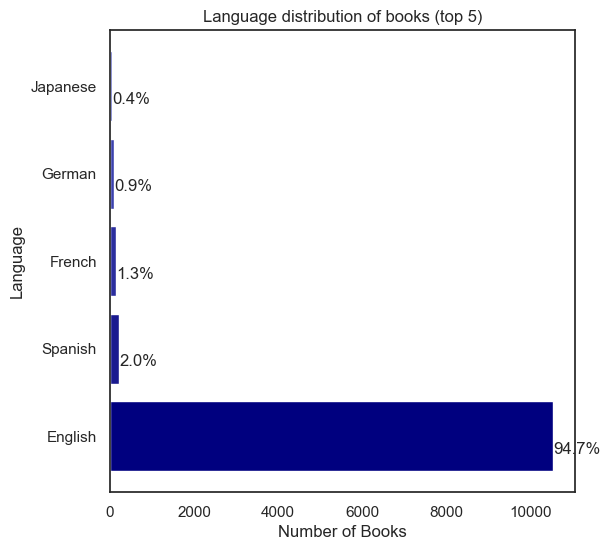

In [143]:
df_lang = df["language"].value_counts().nlargest(5)

plt.figure(figsize=(6,6))
bars = plt.barh(df_lang.index, df_lang, color=colors_blue)
plt.title('Language distribution of books (top 5)')
plt.xlabel('Number of Books')
plt.ylabel('Language')


for bar in bars:
    percentage = '{:.1f}%'.format(100 * bar.get_width() / len(df))
    plt.text(bar.get_width() + 5, bar.get_y() + 0.2, percentage)
    
plt.show()

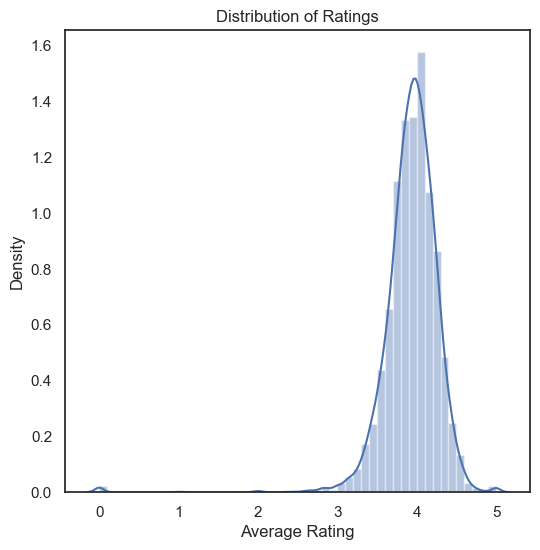

In [144]:
plt.figure(figsize=(6,6))

sns.distplot(df['average_rating'])

plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings')
plt.show()

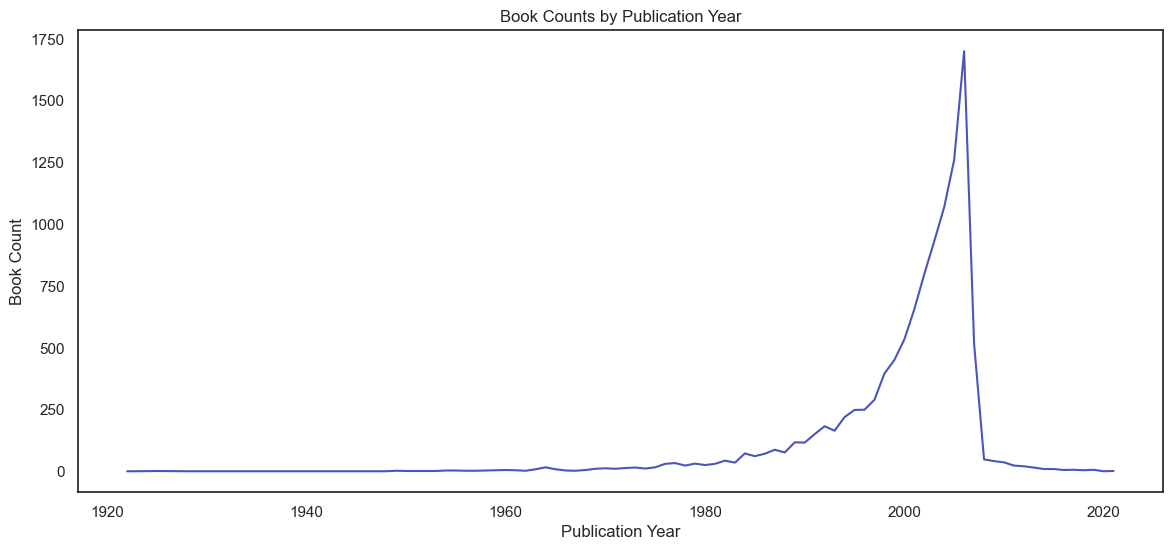

In [145]:
counts_by_year = df.groupby(df['publication_date'].dt.year)['title'].count()

plt.figure(figsize=(14,6))
plt.plot(counts_by_year.index, counts_by_year.values, color='#4a54bb')
plt.xlabel('Publication Year')
plt.ylabel('Book Count')
plt.title('Book Counts by Publication Year')
plt.show()

### Author analysis

NameError: name 'Blue' is not defined

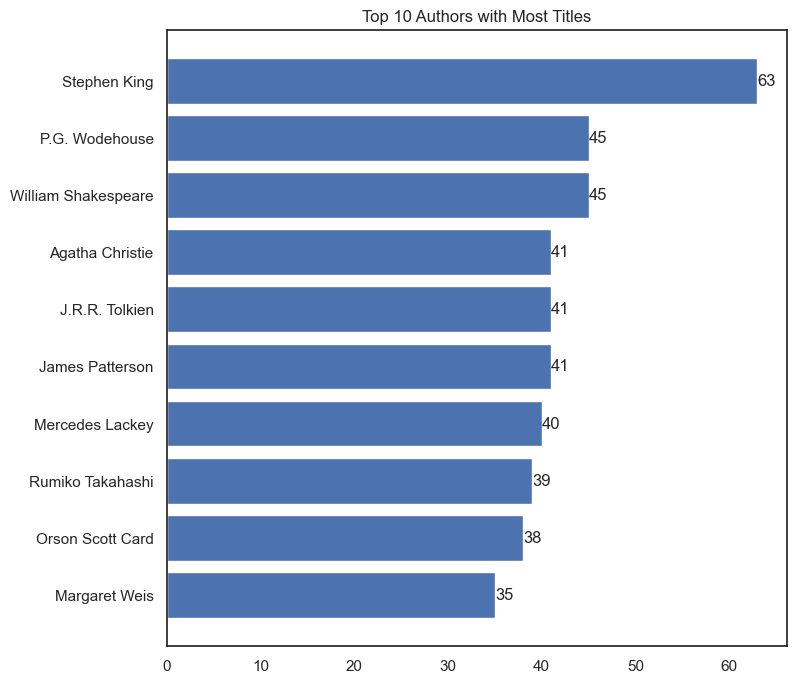

In [166]:
df_subset_unique_titles = df.drop_duplicates(subset=['title'])

# group by author and count titles
plt.figure(figsize=(8,8))

top_authors = df_subset_unique_titles.groupby('author')['title'].count().nlargest(10)[::-1]

plt.title('Top 10 Authors with Most Titles')
plt.bar_label(plt.barh(top_authors.index, top_authors.values), 
              labels=top_authors.values, 
              label_type='edge')
plt.barh(top_authors.index, top_authors.values, color=Blue)
plt.xlabel('Number of Titles')
plt.ylabel('Author')
plt.show()

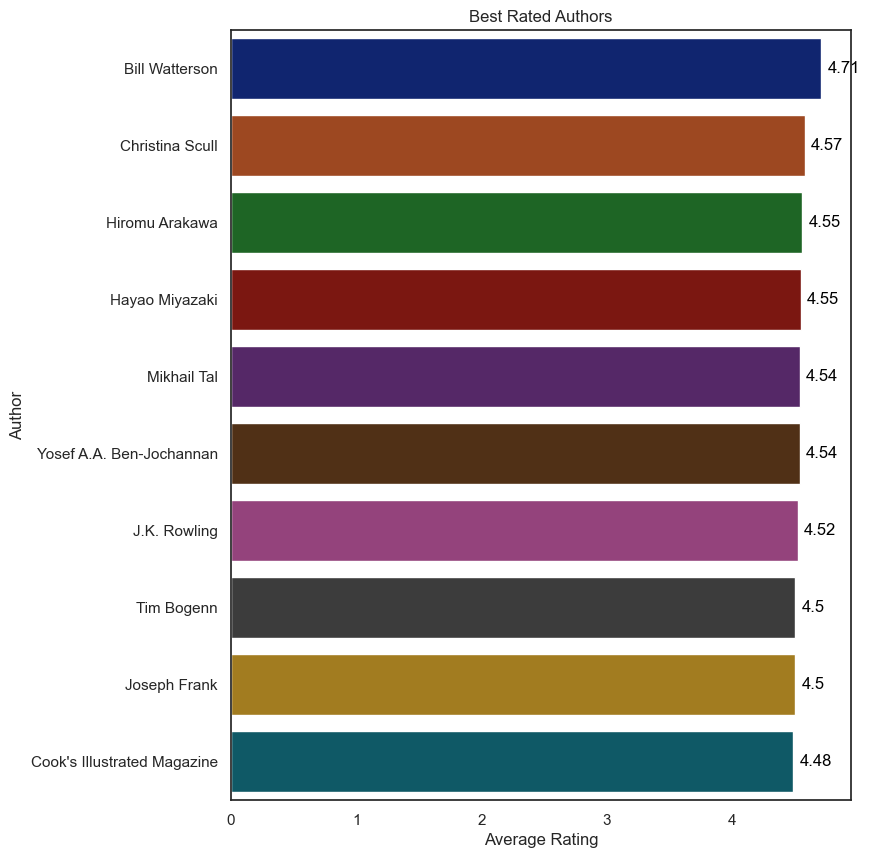

In [182]:
# Filtering out
plt.figure(figsize=(8,10))
df_filtered = df.groupby('author').filter(lambda x: len(x) >= 2)
df_filtered = df_filtered.groupby('author')['average_rating'].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=df_filtered.values, y=df_filtered.index, palette="dark")

plt.title('Best Rated Authors')
plt.xlabel('Average Rating')
plt.ylabel('Author')

# Adding the numbers on the bars
for i, v in enumerate(df_filtered.values):
    ax.text(v + 0.05, i, str(round(v,2)), color='black', fontsize=12, va='center')

plt.show()

<AxesSubplot: >

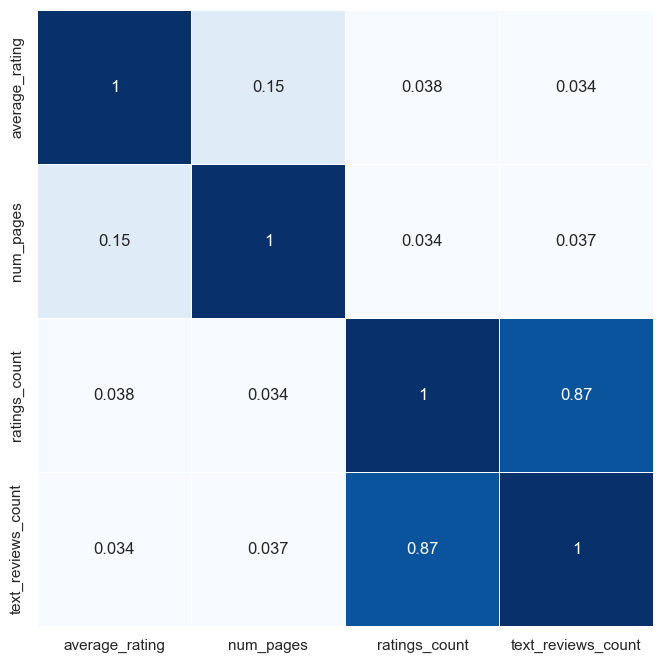

In [148]:
# Getting only numerical columns for heatmap.
df_numeric = df.select_dtypes(include=np.number)
df_numeric.drop("bookID", axis=1, inplace=True)
plt.figure(figsize=(8,8))
# cbar : colorbar
# square : each cell will be square shaped
sns.heatmap(df_numeric.corr(), cbar=False, square=True, annot=True, cmap='Blues', linewidths=0.5)

In [149]:
'''
plt.figure(figsize=(10,10))

# Scatter plot
plt.scatter(df['num_pages'], df['average_rating'], s=8, alpha=0.5)

plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.title('Correlation between Number of Pages and Average Rating')

# Show the plot
plt.show()
'''

"\nplt.figure(figsize=(10,10))\n\n# Scatter plot\nplt.scatter(df['num_pages'], df['average_rating'], s=8, alpha=0.5)\n\nplt.xlabel('Number of Pages')\nplt.ylabel('Average Rating')\nplt.title('Correlation between Number of Pages and Average Rating')\n\n# Show the plot\nplt.show()\n"

In [150]:
'''
plt.figure(figsize=(10,10))

# Scatter plot
plt.scatter(df['text_reviews_count'], df['average_rating'], s=8, alpha=0.5)

plt.xlabel('Number of Text Reviews')
plt.ylabel('Average Rating')
plt.title('Correlation between Number of Text Reviews and Average Rating')

# Show the plot
plt.show()
'''

"\nplt.figure(figsize=(10,10))\n\n# Scatter plot\nplt.scatter(df['text_reviews_count'], df['average_rating'], s=8, alpha=0.5)\n\nplt.xlabel('Number of Text Reviews')\nplt.ylabel('Average Rating')\nplt.title('Correlation between Number of Text Reviews and Average Rating')\n\n# Show the plot\nplt.show()\n"

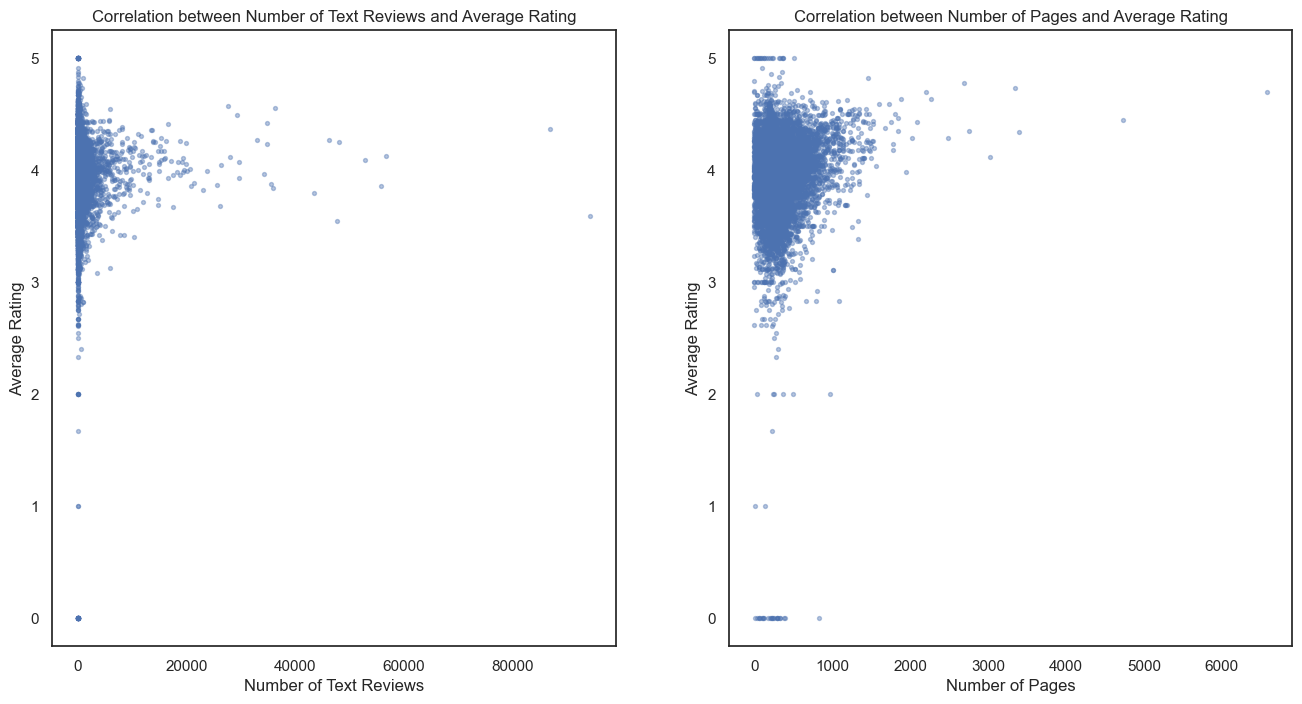

In [151]:
# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first scatter plot on the first subplot
ax1.scatter(df['text_reviews_count'], df['average_rating'], s=8, alpha=0.4)
ax1.set_title('Correlation between Number of Text Reviews and Average Rating')
ax1.set_xlabel('Number of Text Reviews')
ax1.set_ylabel('Average Rating')

# Plot the second scatter plot on the second subplot
ax2.scatter(df['num_pages'], df['average_rating'], s=8, alpha=0.4)
ax2.set_title('Correlation between Number of Pages and Average Rating')
ax2.set_xlabel('Number of Pages')
ax2.set_ylabel('Average Rating')

# Show the plot
plt.show()

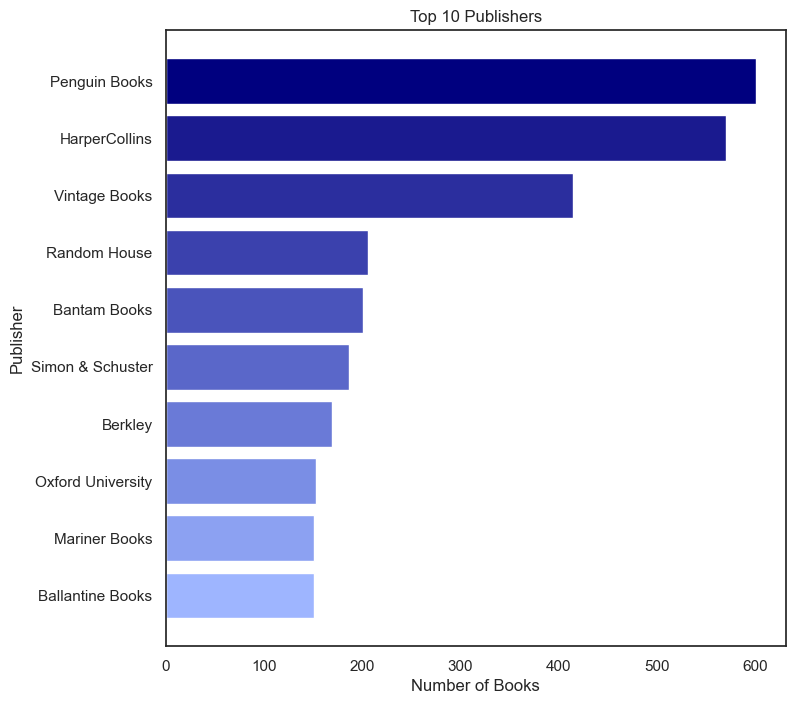

In [152]:
top_publishers = df_pub['publisher'].value_counts().nlargest(10)
top_publishers = top_publishers[::-1]

plt.figure(figsize=(8, 8))

cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", colors_blue[::-1])

plt.barh(top_publishers.index, top_publishers.values, color=cmap(np.linspace(0, 1, len(top_publishers))))
plt.title('Top 10 Publishers')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

### Analysis on genre

genre
Catholic            4.590000
Chess               4.535000
Birds               4.413333
Gardening           4.390000
African American    4.340000
Name: average_rating, dtype: float64


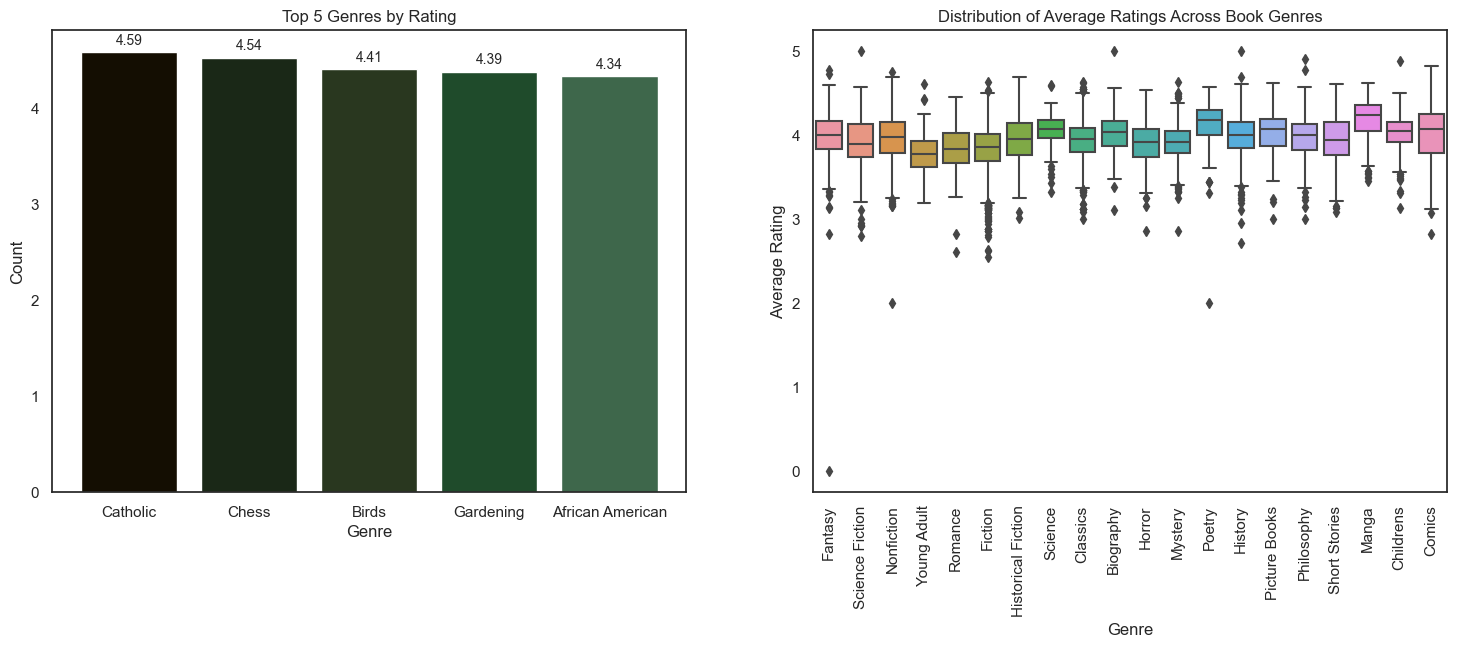

In [175]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top 20 genres + blank
top_20_genre=list(df["genre"].value_counts().nlargest(21).index)
# Remove blank
top_20_genre.remove("blank")
# Filtering dataframe for the top 20 genres.
df_filtered_by_top20_genres=df[df["genre"].isin(top_20_genre)]

df_rating = df[df["ratings_count"] >= 100]
genres = df_rating.groupby("genre")["average_rating"].mean()
# select the top 5 genres by average rating
top_genres = genres.sort_values(ascending=False).head(6)
top_genres=top_genres[top_genres.index != "Audiobook"]
# print the top 5 genres
print(top_genres)

# First subplot
ax1 = axes[0]
ax1.bar(top_genres.index, top_genres.values, color=colors_green)
# Putting values on bars.
ax1.set_title('Top 5 Genres by Rating')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Count')
for i, value in enumerate(top_genres.values):
    ax1.text(i, value+0.05, round(value, 2), ha='center', va='bottom', fontsize=10)

# Second subplot
ax2 = axes[1]
sns.boxplot(data=df_filtered_by_top20_genres, x="genre", y="average_rating", ax=ax2)
ax2.set_xlabel('Genre')
ax2.set_ylabel('Average Rating')
ax2.set_title('Distribution of Average Ratings Across Book Genres')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

In [154]:
df.head()

,bookID,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language,author,genre,description
0,1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,2006-09-16,Scholastic,English,J.K. Rowling,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,2004-09-01,Scholastic,English,J.K. Rowling,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,2003-11-01,Scholastic,English,J.K. Rowling,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,2004-05-01,Scholastic,English,J.K. Rowling,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690,41428,164,2004-09-13,Scholastic,English,J.K. Rowling,Fantasy,Box Set containing Harry Potter and the Sorcer...


In [155]:
df.to_csv("df_final.csv", index=False)

In [156]:
df["language"].value_counts()

English               10537
Spanish                 218
French                  144
German                   99
Japanese                 46
Multiple Languages       19
Chinese                  14
Ancient Greek            11
Portuguese               10
Italian                   5
Latin                     3
Middle English            3
Russian                   2
Swedish                   2
Dutch                     1
Arabic                    1
Serbian                   1
Malay                     1
Galician                  1
Welsh                     1
Norwegian                 1
Turkish                   1
Scottish Gaelic           1
Aleut                     1
Name: language, dtype: int64